# Siamese Network
Neural network is almost good at every problem but they tend to rely on the need of more data or batter quality data. Problem like face recognition and signature verification, we can't always rely on more data. To solve this problem a new type of neural network is used called Siamese Networks. It only use few numbers of images to get better predictions, it has the ability to learn from very little data.

## What are Siamese Network
Is a class of neural network architecture that contain two or more identical subnetworks. "identical" mean they have same configuration with the same parameters and weight. Parameter updating is mirrored across sub-networks. It is used to find the similarityof the inputs by comapring its features vectors. <br><br>
Traditionally normal NN learns to predict multiple classes, this can be problematic when adding or removing new classes to the adta, in this case we have to update the NN and retrain the whole dataset. Also Deep neural network need large volume of data to train on. SNN (Siamese Neural Network) on the other hand only learn similarity function. Thus we can train it to see of two image are the same. This enables us to classify new classes of data without training the network again.

## Pros and Cons of SNN
**Pros:**
1. More robust to class imbalance, with the aid of one-shot learning, given a few images per class is sufficient for SNN to recognize images in the futures.
2. Nice to an ensemble with the best classifier, given the learning mechanism it is somewhat different from classification, simple averaging of it with a classifier can do much better than average 2 correlated supervised model (e.g. GBM & RF classifier).
3. Learning from semantic similarity, siamese focuses on learning embedding (in the deeper layer) that place the same classes/concepts close together. Hence can learn semantic similarity.
<br><br>

**Cons:**
1. Needs more training time than normal networks, since siamese networks involves quadratic pairs to learn from (to see all information available) it is slower than normal classification type of learning(pointwise learning)
2. Doesn't output probabilities, since training involves pairwise learning, it won't output the probabilities of the predicition but the distance from each class.

## Image Classification Model using Traditional Deep Learning Neural Network Architecture
You first need to obtained labeled dataset containing images of dogs and cats. After training the neural network, and upon gicing any input image the network can only output labels as dog or cat. This is standard computer vision problem known as Image Classification.<br>
In classification, the image is given into the NN and the output layer give the list of probability distribution over all classes (using softmax or other activation function as per the classification problem being solved).<br>
For example i want to classify if this image is cat ot not then for every inpu image we generate two probabilities indicating the probability of the image belonging to each of the 2 classes, but when training we require a lot of images of each class and the model can only predict from the trained labels. <br>
<span style="background-color: #FFFFED">One problem where we might come across is when we want to create employee attendance systems, this the cost of data collection and re-training is high each time a new class is added or a new employee joins</span> <br>

## What is Similarity Learning?
Technique of supervised machine learning in which the goal is make the model learn, which is a similarity function that measures how similar two objects are and returns a similarity value.<br>
- High score is returned when objects are similar.
- Low score is returned when objects are different.

## Use Case of Siamese Network
Most popular use cases of similarity learning are employee attendance and signature varification system. In siamese network, we require only one training example for each class. Due to this name One Shot.
### Employee attendace system
- Let's say I want to create an attendance system for a small organization with 20 employees 
There will be some challenges in this attendance system:
1. The need of different images of each employee.
2. New employee or employee leaving -> re-train again. Basically not scalabel. (Which makes siamese network model great solution)
Insted of classifying a test image to one of the 20 people, the siamese network takes a reference image of the person as input and generates similarity score denoting the probability that the two input images are of the same person. <br> <br>
The similarity score lies from 0-1 (where 0 means no similarity and 1 means full similarity)

## Architecture of SNN
![SNN Architecture](Pict/Siamese_network.png "SNN Architecture") <br> <br>
Containing two or more identical sub-networks, they have the same configuration with the same parameters and wights. Mostly, we only train one if N (the number of subnetworks chosen for solving the problem) the subnetworks and use the same configuration (params and wights) for other sub-networks. SNN used to find the similarity of the inputs by comparing their feature vectors. <br><br>

How does it works? <br>
1. The first subnetworks takes an image (A) as input and passes through convolutional layers and fully connected layers, we get a vector representation of the image.
2. Again the second image (B) through a network that is exactly the same with the same weights and parameters.
3. Now both the encoding can be compared to know how similar they are, if the images are similar then the encoding wil also be quite similar.
4. We will measure the distance between these two vectors and if the distance between these is small then the vectors are similar or the same classes and if the distance is larger then the vectors are different from one another, based on the score.

## Loss Function
Since training SNN involves pairwise learning usual, cross enthropy loss cannot be used in this case, mainly there are two loss functions used in training Siamese networks:
1. Triplet Loss
Where baseline(anchor) is comapred to a positive (thruthy) input and a negative (falsy) input. The distance from baseline input to the positive is minimized and the distance from baseline input to the negative is maximized. During the training process, an image triplet (anchor image, negative image, positive image)(anchor image, negative image, positive image) is fed into the model as a single sample. The idea behind this is that distance between the anchor and positive images should be smaller than that between the anchor and negative images.
2. Contrastive Loss
It is a distance-based loss as opposed to more conventional error-prediction losses. This loss is used to learn embeddings in which two similar points have a low Euclidean distance and two dissimilar points have a large Euclidean distance.

## Training + Testing
- Initialize the siamese network, loss function, optimizer(Adam, Adagrad, SGD etc).
- Pass the images one by one out of the image pairs through the siamese network, as here training involves pairwise learning.
- Calculate the loss using the outputs from the first and second images using the loss.
- Back propogate through the model to calculate the gradients of our model.
- Update the weights using an optimizer to minimize the loss after a certain number of epochs.
- After reaching max epochs we have set for the model and also get the least loss possible.
- Save the model

## Trying Using Siamese

In [1]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [3]:
# Define the base path
BASE_PATH = os.path.join('/Users/komangandikawirasantosa', 'AI-Notes', 'Computer-Vision', 'data')

# Setup paths
POS_PATH = os.path.join(BASE_PATH, 'positive')
NEG_PATH = os.path.join(BASE_PATH, 'negative')
ANC_PATH = os.path.join(BASE_PATH, 'anchor')


In [ ]:
# Make the directories
os.makedirs(POS_PATH, exist_ok=True)
os.makedirs(NEG_PATH, exist_ok=True)
os.makedirs(ANC_PATH, exist_ok=True)

In [15]:
# Uncompress Tar GZ Labelled Faces
!tar -xf /Users/komangandikawirasantosa/AI-Notes/Computer-Vision/lfw.tgz

In [16]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [17]:
os.listdir('lfw')

['German_Khan',
 'Stefano_Gabbana',
 'Dragan_Covic',
 'Jeff_Hornacek',
 'Sureyya_Ayhan',
 'Deb_Santos',
 'Bob_Newhart',
 'Wang_Hailan',
 'Paul_McNulty',
 'Jimmy_Iovine',
 'Claudia_Pechstein',
 'Ranil_Wickremasinghe',
 'Ben_Chandler',
 'Mark_Komara',
 'Rand_Beers',
 'Joanne_Woodward',
 'John_Bond',
 'Reginald_Hudlin',
 'Lee_Baca',
 'Mary-Kate_Olsen',
 'Emily_Stevens',
 'Xiang_Huaicheng',
 'Phil_Mickelson',
 'Gerry_Kelly',
 'Salma_Hayek',
 'Jim_Edmonds',
 'Martina_McBride',
 'Anthony_Pico',
 'Jose_Theodore',
 'Heidi_Fleiss',
 'Mark_Richt',
 'Mike_Smith',
 'Paul_ONeill',
 'Horace_Newcomb',
 'Mohammad_Fares',
 'JK_Rowling',
 'Shinya_Taniguchi',
 'Tony_Curtis',
 'Laurie_Pirtle',
 'Angel_Maza',
 'Ray_Sherman',
 'Nancy_Powell',
 'Kathryn_Tucker',
 'Gro_Harlem_Brundtland',
 'Jacqueline_Marris',
 'Mikhail_Gorbachev',
 'Takuma_Sato',
 'Ray_Lewis',
 'Hank_Aaron',
 'Chip_Knight',
 'Tracee_Treadwell',
 'Ronald_Young_Jr',
 'Gustavo_Cisneros',
 'Jack_Osbourne',
 'Isidro_Pastor',
 'Mike_Duke',
 'Natal

In [4]:
# Import uuid library to generate unique image names
import uuid

In [5]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'/Users/komangandikawirasantosa/AI-Notes/Computer-Vision/data/anchor/47cb2f8e-9288-11ef-b150-6ab63be3cfbf.jpg'

In [7]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(1)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

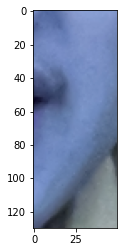

In [10]:
plt.imshow(frame[120:120+250,200:200+250, :])

## Source
- [A Comprehensive Guide to Siamese Neural Networks by Rinki Nag](https://medium.com/@rinkinag24/a-comprehensive-guide-to-siamese-neural-networks-3358658c0513)
- [A friendly introduction to Siamese Networks by Sean Benhur](https://towardsdatascience.com/a-friendly-introduction-to-siamese-networks-85ab17522942)
- [Build a Python Facial Recognition App with Tensorflow and Kivy by Nicholas Renotte on YouTube](https://www.youtube.com/watch?v=LKispFFQ5GU)

tanks 4 readin dis <3